In [26]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import pandas as pd

In [28]:
df=pd.read_csv(r"C:\Users\CVR\Desktop\22B81A1292\28-03-25\parkinsons_data.csv")

In [30]:
# Drop the 'name' column
df.drop(columns=['name'], inplace=True)

In [32]:
# Separate features and target variable
X = df.drop(columns=['status'])
y = df['status']


In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [38]:
# Convert PCA results into a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['status'] = y

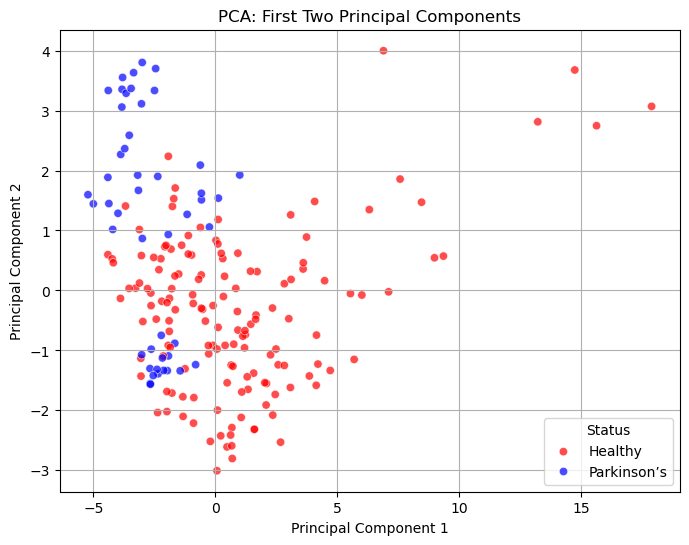

In [40]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='status', palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Status', labels=['Healthy', 'Parkinson’s'])
plt.show()

In [42]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


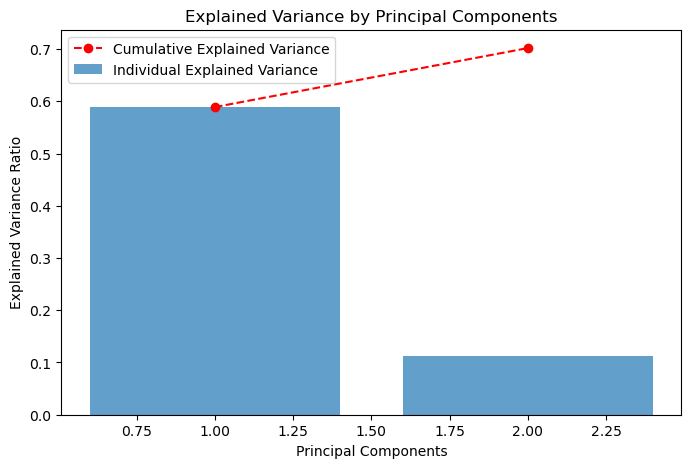

In [44]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, 3), cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

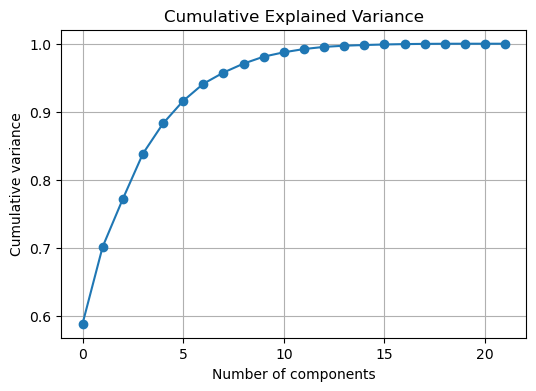

In [46]:
# Scree plot - Cumulative Explained Variance
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()